In [10]:
def normal_pdf(x, mu=0.0, sigma=1.0):
    # Answer: A*B
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    B = np.exp(- 0.5 * ((x - mu) / sigma) **2)

    return A*B

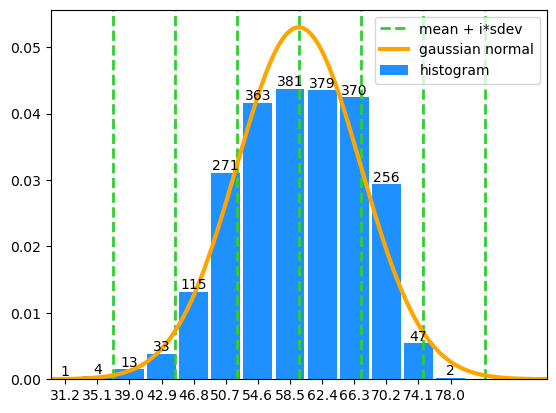

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

l = {31.2: 1, 35.1: 4, 39.0: 13, 42.9: 33, 46.8: 115, 50.7: 271, 54.6: 363, 58.5: 381, 62.4: 379, 66.3: 370, 70.2: 256, 74.1: 47, 78.0: 2}
# convert the dictionary to a list
l_array = np.array( [k for k, v in l.items() for _ in range(v)])


s = sum(l.values())
bin_width = 3.9
bin_centers = list(l.keys())
heights = [v/s/bin_width for v in l.values()]
plt.bar(bin_centers, heights, width=bin_width*0.9, color='dodgerblue', label='histogram')
for c, h, v in zip(bin_centers, heights, l.values()):
    plt.text(c, h, v, ha='center', va='bottom')
plt.xticks(bin_centers)
mean = l_array.mean()
sdev = l_array.std()
for i in range(-3, 4):
    plt.axvline(mean+i*sdev, color='limegreen', ls='--', lw=2, label='mean + i*sdev' if i == 0 else None)

x = np.linspace(mean-4*sdev, mean+4*sdev, 500)
plt.plot(x, norm.pdf(x, mean, sdev), color='orange', lw=3, label='gaussian normal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

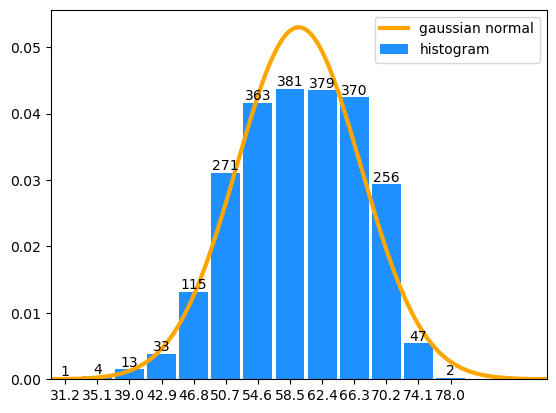

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm

l = {31.2: 1, 35.1: 4, 39.0: 13, 42.9: 33, 46.8: 115, 50.7: 271, 54.6: 363, 58.5: 381, 62.4: 379, 66.3: 370, 70.2: 256, 74.1: 47, 78.0: 2}
# convert the dictionary to a list
l_array = np.array( [k for k, v in l.items() for _ in range(v)])


s = sum(l.values())
bin_width = 3.9
bin_centers = list(l.keys())
heights = [v/s/bin_width for v in l.values()]
plt.bar(bin_centers, heights, width=bin_width*0.9, color='dodgerblue', label='histogram')
for c, h, v in zip(bin_centers, heights, l.values()):
    plt.text(c, h, v, ha='center', va='bottom')
plt.xticks(bin_centers)
#mean = l_array.mean()
#sdev = l_array.std()
#for i in range(-3, 4):
#    plt.axvline(mean+i*sdev, color='limegreen', ls='--', lw=2, label='mean + i*sdev' if i == 0 else None)

x = np.linspace(mean-4*sdev, mean+4*sdev, 500)
plt.plot(x, norm.pdf(x, mean, sdev), color='orange', lw=3, label='gaussian normal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show()

2235.0 2235.0 2235.0


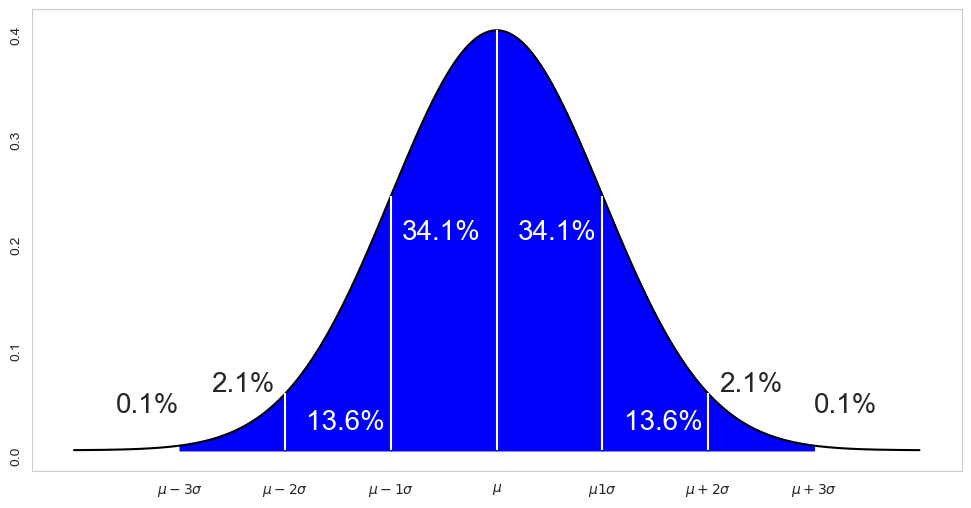

In [141]:
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from scipy.stats import lognorm

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(-4.0, 4.0, 1001)


mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))

ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$', color='black')


ax.vlines(0.0, 0.0, normal_pdf(0.0), color="white")
ax.vlines([-1.0, 1.0,], 0.0, normal_pdf(-1.0), color="white")
ax.vlines([-2.0, 2.0,], 0.0, normal_pdf(-2.0), color="white")

x_interval = np.linspace(-1.0, 1.0, 101)
ax.fill_between(x_interval, normal_pdf(x_interval), color='blue')

ax.fill_between(x, y, where=((x >= -3) & (x <= -2)), color='blue')
ax.fill_between(x, y, where=((x >= - 2) & (x <= -1)), color='blue')
ax.fill_between(x, y, where=((x >= 1) & (x <= 2)), color='blue')
ax.fill_between(x, y, where=((x >= 2) & (x <= 3)), color='blue')
#ax.fill_between(x, y, where=((x >= 2) & (x <= 3)), color='red')

ax.set_xticks([-3,-2,-1,0, 1, 2, 3])
ax.set_xticklabels(['$\mu-3\sigma $', '$\mu-2\sigma $', '$\mu-1\sigma $', '$\mu $','$\mu1\sigma $', '$\mu+2\sigma $', '$\mu+3\sigma $',])

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4 ])
for tick in ax.get_yticklabels():
    tick.set_rotation(90)

median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)
print(q1, median, q3)


ax.annotate('0.1%', xy=(-3.3,0.03), xycoords='data', fontsize=20,  arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('2.1%', xy=(-2.4,0.05), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('13.6%', xy=(-1.8,0.02), xycoords='data', color='white', fontsize=20)
ax.annotate('34.1%', xy=(-0.9, 0.2), xycoords='data', color='white', fontsize=20)
ax.annotate('34.1%', xy=(0.2, 0.2), xycoords='data', color='white', fontsize=20)
ax.annotate('13.6%', xy=(1.2 , 0.02), xycoords='data', color='white', fontsize=20)
ax.annotate('2.1%', xy=(2.4 , 0.05), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('0.1%', xy=(3.3, 0.03), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')


ax.grid()

#print(f'(-1.0, {normal_pdf(-1.0)})')

#print(f'(1.0, {normal_pdf(1.0)})')


In [ ]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm
# https://stackabuse.com/rotate-axis-labels-in-matplotlib/
# https://stackoverflow.com/questions/56976122/how-to-shade-a-region-under-a-curve
# https://stackoverflow.com/questions/49630427/how-to-plot-normal-distribution-with-percentage-of-data-as-label-in-each-band-bi
# https://stackoverflow.com/questions/43360414/annotate-the-quartiles-with-matplotlib-in-a-normal-distribution-plot
# https://matplotlib.org/stable/users/explain/text/annotations.html#annotations


In [61]:
print(f'(-1.0, {normal_pdf(-1.0)})')

print(f'(1.0, {normal_pdf(1.0)})')


(-1.0, 0.24197072451914337)
(1.0, 0.24197072451914337)
